In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "..")) 
sys.path.append(os.path.join(PROJECT_ROOT, "data"))
from dataset import FakeNewsDataset
from torch.utils.data import DataLoader
from transformers import RobertaTokenizer
MODEL_NAME = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [4]:
DATA_PATHS = {
    "ISOT": "../data/processed/processed_ISOT.csv",
    "FakeNews-Kaggle": "../data/processed/processed_FakeNews.csv",
    "LIAR": "../data/processed/processed_LIAR.csv"
}

In [5]:
def load_dataset(name, file_path, batch_size=8):
    print(f"\nLoading dataset: {name}")
    dataset = FakeNewsDataset(file_path, tokenizer)
    dataset_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  # Wrap with DataLoader
    return dataset_loader

In [6]:
datasets = {name: load_dataset(name, path) for name, path in DATA_PATHS.items()}


Loading dataset: ISOT

Loading dataset: FakeNews-Kaggle

Loading dataset: LIAR


In [7]:
for name, file_path in DATA_PATHS.items():
    df = pd.read_csv(file_path)
    print(f"{name}: {len(df)} samples")
    print(df.head())
    print("\n")

ISOT: 44898 samples
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


FakeNews-Kaggle: 20800 samples
   id                                        

In [11]:
def plot_class_distribution():
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (name, file_path) in enumerate(DATA_PATHS.items()):
        df = pd.read_csv(file_path)
        df['label'].value_counts().plot(kind='bar', ax=axes[i], title=name)
    plt.show()

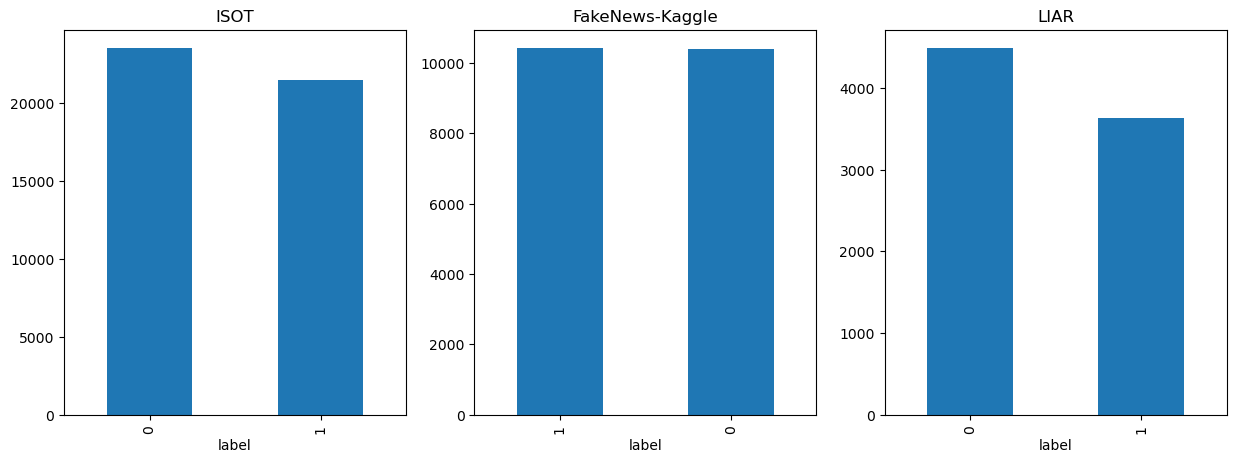

In [12]:
plot_class_distribution()

In [13]:
for name, dataset_loader in datasets.items():
    print(f"\nExample samples from {name}:")
    batch = next(iter(dataset_loader))
    for i in range(3):
        print(f"Sample {i+1}: {batch['input_ids'][i][:20]}... (truncated)")


Example samples from ISOT:
Sample 1: tensor([   0, 5762,   36, 1251,   43,  111,  270,  807,  140,   17,   27,   29,
        9461,    7,  836, 2232, 3227,   11,  121,    4])... (truncated)
Sample 2: tensor([   0, 5762,   36, 1251,   43,  111, 1590,    5,   78,  411,  377,    9,
           5,  140, 5662,    6,    5, 6982, 5922, 3131])... (truncated)
Sample 3: tensor([    0, 14280,  1729,    36,  1251,    43,   111,   121,     4,   104,
            4,  1863,     9,   331,  9746,  8760,    15,   273,  5249,   103])... (truncated)

Example samples from FakeNews-Kaggle:
Sample 1: tensor([    0,  6934,   673,  5885,   344, 19621, 16790,  1437,    93,  1437,
         1437,    83,  7673, 46329,  1788,    31,     5,  1437,  1437,  3336])... (truncated)
Sample 2: tensor([    0, 41286,    16,     6,   117,    65,    64,   269,  3190, 12674,
        12695,     4,   125,    23,   944,  7374,  5104,    42,    76,     6])... (truncated)
Sample 3: tensor([    0,  4043,   111,  2668, 27528,    38, 384